In [ ]:
!git clone https://github.com/nexus-lab/qkd_modules.git
%cd qkd_modules

In [ ]:
from PIL import Image
import IPython.display as display

drive = "QKDResources/"

img1 = Image.open(drive + "images/04/nanomod14-fig1.png")
img2 = Image.open(drive + "images/04/nanomod14-fig2.png")
img3 = Image.open(drive + "images/04/nanomod14-fig1-sa2.png")
img4 = Image.open(drive + "images/04/nanomod14-fig2-sa2.png")
img5 = Image.open(drive + "images/04/nanomod14-fig3-sa2.png")
img6 = Image.open(drive + "images/04/nanomod14-fig4-sa2.png")

# 04 Single Qubit

## Lesson Goals

1. Students will understand the basics of measuring a qubit.
2. Students will be able to compute the probabilities of outcomes upon measurement.
3. Student will be able to compute transition amplitudes from one state to the other.
4. Student will understand the notion of global and local phase and their interpretations.
5. Students will understand the theory behind projective measurements.
6. Students will understand the measurement postulate in quantum mechanics for projective measurements.
7. Students will be able to compute the projection operators for a basis.
8. Students will be able to calculate the probabilities of outcomes for a given basis using projection operator and determine the final state of the qubit.
9. Students will understand the density matrix formulation and will be able to apply it for projective measurements.
10. Students will understand and will be able to apply common single-qubit operations (gates).
11. Students will be able to build sequential quantum circuits for single qubits.
12. Students will be able to compute the effect of given sequential quantum circuit on a qubit.

In [ ]:
#It is important to run this cell before starting with this notebook
#All imports are put here
#from IPython.core.display import HTML
!pip install qutip
import qutip as qt
import numpy as np
import ipywidgets as widgets   #you have to enable extensions for jupyter notebook after installing
import sys
from ipywidgets import interact
import matplotlib.pyplot as plt

## 04.01: Basics of Measuring a Qubit

### 04.01.01: Measuring a Qubit

Let's discuss single-qubit measurements. So far we've said that a qubit $\rvert\psi\rangle=\alpha\rvert0\rangle+\beta\rvert1\rangle$ collapses to $\rvert0\rangle$ with probability $\rvert\alpha\rvert^2$ and to $\left|1\right>$ with probability $\rvert\beta\rvert^2$.

Quantum mechanics says that any device used to measure a two-state quantum system must have two states that are its preferred states that form an orthonormal basis for the corresponding two-dimensional vector space. We denote these by $\{\rvert v\rangle, \rvert v^\perp\rangle\}$. Measurement then transforms the quantum state being measured into one of these two preferred states. And the probabilities for these transformations are given by the modulus squared of the corresponding amplitudes. Further, this property of quantum systems is based on empirical observations and not derived from any other physical laws.

Therefore, we must specify the basis being used for measurement when we say "measure a qubit". If no basis is specified then a standard basis is assumed.

Also, this implies that measurement changes the state of a quantum system. Consequently, if a qubit $\rvert\psi\rangle=\alpha\rvert v\rangle+\beta\rvert v^\perp\rangle$ is measured and it collapses to $\rvert v^\perp\rangle$ then a second measurement in the same basis will always result in state $\rvert v^\perp\rangle$ with probability 1 because now the amplitude of $\rvert v\rangle$ is zero.

#### Loss of information

From the above discussion it is clear that unless the qubit is already in one of the basis states, a measurement will change the state of the qubit and the original state of the qubit will be lost forever.  

Further, this postulate of quantum mechanics says that although a qubit has infinite possible states, we can only extract one bit of information out of it because the qubit has to collapse to one of the two possible basis states (representing one bit of information).

Also, distinct quantum states may have same probabilities of collapse. For example, $\frac{1}{\sqrt{2}}(\rvert0\rangle+\rvert1\rangle)$, $\frac{1}{\sqrt{2}}(\rvert0\rangle-\rvert1\rangle)$ and $\frac{1}{\sqrt{2}}(i\rvert0\rangle-\rvert1\rangle)$ all have exactly the same probabilities of collapse in the standard basis but are completely distinct quantum states that behave differently in other circumstances.

### 04.01.02: Transition Amplitudes

So far we know how to compute the probabilities of collapse of a qubit given its state description. For example, given the qubit $\begin{bmatrix}0\\1\end{bmatrix}$, we know that it will collapse to state $|1\rangle$ with probability 1. Another example was $\begin{bmatrix}\frac{1}{\sqrt{2}}\\\frac{1}{\sqrt{2}}\end{bmatrix}$ where the qubit would collapse to state $\rvert0\rangle$ or $\rvert1\rangle$ with equal probability. We found this by squaring the modulus of the coefficients in positions that represent states $\rvert0\rangle$ and $\rvert1\rangle$.

Another way of thinking about the computation above is that we as asking: Given state $\rvert\psi\rangle$ what are the transition amplitudes to states $\rvert0\rangle$ and $\rvert1\rangle$. It turns out we can compute this by taking the inner product of the vector with the state we would like to transition to. For example, given qubit $\begin{bmatrix}0\\1\end{bmatrix}$ the transition amplitudes to state $\rvert0\rangle$ is computed as: $\langle0\rvert1\rangle$

In general, however, the state of a qubit can be a complex vector. For example, $\begin{bmatrix}\frac{i}{2}\\-\frac{\sqrt{3}}{2}\end{bmatrix}$ is a valid qubit state. Therefore, while taking the inner product recall that we need to apply the dagger operation. Therefore, the probability amplitude that state $\begin{bmatrix}\frac{i}{2}\\-\frac{\sqrt{3}}{2}\end{bmatrix}$ will transition to state $\begin{bmatrix}1\\0\end{bmatrix}$ is given,

$$\left<\begin{bmatrix}1\\0\end{bmatrix}, \begin{bmatrix}\frac{i}{2}\\-\frac{\sqrt{3}}{2}\end{bmatrix}\right> = \begin{bmatrix}1\\0\end{bmatrix}^\dagger\begin{bmatrix}\frac{i}{2}\\-\frac{\sqrt{3}}{2}\end{bmatrix}=\frac{i}{2}$$

Therefore, the probability of "seeing" $\rvert0\rangle$ is $\left|\frac{i}{2}\right|^2=\frac{1}{4}$. This is exactly what we expected!

We can compute the transition amplitude to $\rvert1\rangle$ as $\left<\begin{bmatrix}0\\1\end{bmatrix}, \begin{bmatrix}\frac{i}{2}\\-\frac{\sqrt{3}}{2}\end{bmatrix}\right> = \begin{bmatrix}0\\1\end{bmatrix}^\dagger\begin{bmatrix}\frac{i}{2}\\-\frac{\sqrt{3}}{2}\end{bmatrix}=\frac{-\sqrt{3}}{2}$. Therefore, the probability of collapse to $\rvert1\rangle$ is $\left|\frac{-\sqrt{3}}{2}\right|^2=\frac{3}{4}$.

In general, the probability amplitude of transitioning from state $\rvert\psi\rangle$ to state $\rvert\psi'\rangle$ is computed as follows: $\left<\psi'\rvert\psi\right>$. The probability is given by $\left|\left<\psi'\rvert\psi\right>\right|^2$.

The transition amplitudes between two states may be zero. This happens when the states are mutually orthogonal to each other. Therefore, orthogonal states are "as far apart" as possible and can be distinguished from each other with certainty. As a result, we often use orthonormal basis which guarantees that the result of a measurement is one of the basis states and never a superposition of the basis states.

Since we can represent any qubit $\rvert\psi\rangle$ in the orthonormal basis $\{\rvert b_0\rangle, \rvert b_1\rangle,\ldots,b_{n-1}\rangle\}$ as,

$$\rvert\psi\rangle=b_0\rvert b_0\rangle+b_1\rvert b_1\rangle+\ldots+b_{n-1}\rvert b_{n-1}\rangle$$

Then the probability amplitude of $\rvert\psi\rangle$ collapsing to state $\rvert b_i\rangle$ is given by, $b_i=\left<b_i\rvert\psi\right>$. Which gives $\rvert b_i\rvert^2$ as the probability of ending up in state $\rvert b_i\rangle$.

<b>Example:</b> The probability amplitude of state $\rvert\psi\rangle=\frac{\sqrt{2}}{2}\begin{bmatrix}1\\i\end{bmatrix}$ transitioning to state $\rvert\phi\rangle=\frac{\sqrt{2}}{2}\begin{bmatrix}i\\-1\end{bmatrix}$ is computed as follows: Compute the bra of $\rvert\phi\rangle$, $\langle\phi\rvert=\frac{\sqrt{2}}{2}\begin{bmatrix}-i&-1\end{bmatrix}$, then the inner product with $\rvert\psi\rangle$, $\langle\phi\rvert\psi\rangle=-i$.

### 04.01.03: Global and Relative Phases

<b>Global phase:</b> It turns out that two qubits that can be written as multiple of each other, for example $\alpha\left|0\right>+\beta\left|1\right>=c\cdot(\alpha'\left|0\right>+\beta'\left|1\right>)$, where $c=e^{i\phi}$ is a complex number, are said to be equivalent. Both the qubits represent the same state for all practical purposes. We call $c$ the global phase and it has no physical meaning.

<b>Relative phase:</b> The relative phase of a qubit is defined as the complex number $e^{i\phi}$ such that $\frac{\alpha}{\beta}=e^{i\phi}\frac{\rvert\alpha\rvert}{\rvert\beta\rvert}$. Note that $\rvert e^{i\phi}\rvert=1$ and therefore does not always show up in measurement. Two qubits that differ only in relative phases are considered distinct/unique qubits. For example, $\alpha\left|0\right>+\beta\left|1\right>$ and $e^{i\phi}\alpha\left|0\right>+\beta\left|1\right>$ are different states.

## 04.02: Visualizing a qubit

### 04.02.01: Bloch Sphere

Qubits have an interesting three dimensional interpretation. Called the <b><i>Bloch sphere</i></b>, every qubit can be thought of as a point on its surface and every operation as rotation of the sphere. It, however, works only for a single qubit. For multiple qubits, it becomes very difficult to visualize higher dimensions.

Let's start from our Ket notation and figure out how to map it onto a Block sphere. Consider a generic qubit $|\psi\rangle = \alpha|0\rangle+\beta|1\rangle$ where $|\alpha|^2+|\beta|^2=1$. A three dimensional ball of finite radius (here radius is 1) has only two degrees of freedom (think plant Earth with latitude and longitude). Here, we will use the angles the vector representing a qubit makes with the $x$ and the $z$ axis.

Rewriting $\alpha$ and $\beta$ in the polar form, $\alpha=r_0e^{i\phi_0}$ and $\beta=r_1e^{i\phi_1}$ and so,
$$|\psi\rangle=r_0e^{i\phi_0}|0\rangle+r_1e^{i\phi_1}|1\rangle$$

There are still four real parameters: $r_0, r_1, \phi_0$, and $\phi_1$.

We know that multiplying a qubit with a complex number, eg. $c|\psi\rangle$ does not change the physical state of the qubit therefore we will multiply our expression above with $c=e^{-i\phi_0}$ and remove the phase attached to state $|0\rangle$.

$$e^{-i\phi_0}|\psi\rangle=e^{-i\phi_0}(r_0e^{i\phi_0}|0\rangle+r_1e^{i\phi_1}|1\rangle)=r_0|0\rangle+r_1e^{i(\phi_1-\phi_0)}|1\rangle$$

We now have only three real parameters left $r_0, r_1$, and $\phi=\phi_0-\phi_1$.

Given that $|\alpha|^2+|\beta|^2=1 \implies |r_0e^{i\phi_0}|^2+|r_1e^{i\phi_1}|^2 = 1 \implies  |r_0|^2|e^{i\phi_0}|^2+|r_1|^2|e^{i\phi_1}|^2=1$.

We, therefore, get $r_0^2+r_1^2=1$.

If we rename them as $r_0=cos(\theta)$ and $r_1=sin(\theta)$. Substituting we get,

$$|\psi\rangle=cos(\theta)|0\rangle+e^{i\phi}sin(\theta)|1\rangle$$

which only has two free parameters $\theta$ and $\phi$. Therefore, the qubit can then be plotted in a Bloch sphere as shown in the interactive simulation below.

We see in the simulation below that $0\leq\phi<2\pi$ and $0\leq\theta<\frac{\pi}{2}$ are enough to cover all possible qubits. Given just $\theta$ and $\phi$ we can compute $x,y$, and $z$ as follows,
$$x=cos(\phi)\cdot sin(2\theta)$$
$$y=sin(2\theta)\cdot sin(\phi)$$
$$z=cos(2\theta)$$

In [ ]:
def ket_to_bloch(t,p):
    r = 1    #radius of the vector, 1 for block sphere
    x = r * np.cos(p) * np.sin(2*t)
    y = r * np.sin(2*t) * np.sin(p)
    z = r * np.cos(2*t)
    return [x,y,z]

def displayBlochSphere(theta=45, phi=45, azimuth=-60, elevation=30 ):
    bs = qt.Bloch()
    bs.view = [azimuth, elevation]
    t=theta*np.pi/180   #convert to radians
    p=phi*np.pi/180     #convert to radians
    vec=ket_to_bloch(t,p)
    bs.add_vectors(vec)
    bs.show()

In [ ]:
#Run this cell to simulate an interactive Bloch sphere
interact(displayBlochSphere, theta=(0,90,5), phi=(0,360,10), azimuth=(-180,180,10), elevation=(0,180,10))

interactive(children=(IntSlider(value=45, description='theta', max=90, step=5), IntSlider(value=45, descriptio…

<function __main__.displayBlochSphere(theta=45, phi=45, azimuth=-60, elevation=30)>

#### Geometry of Bloch Sphere

As can be seen from the simulation, the north pole of the sphere corresponds to $|0\rangle$ and its polar opposite, the south pole, is the state $|1\rangle$. Further, $\phi$ is the angle that $|\psi\rangle$ makes with the $z$ axis and $\theta$ is the angle that $|\psi\rangle$ makes from the $x$ axis along the equator.

### 04.02.02: Simple 2-D representation

Since the global phase of the qubit has no measureable effect, often we will use a simple 2D representation of the qubit as shown below. The vector represents the qubit in a unit circle. Therefore, we are assuming that qubits are normalized.

In [ ]:
def ket_to_bloch2d(p):
    r = 1    #radius of the vector, 1 for block sphere
    x = r * np.cos(p)
    y = r * np.sin(p)
    z = 0
    return [x,y,z]

def displayUnitCircle2d(phi):
    bs = qt.Bloch()
    bs.view = [180, 90]
    bs.zlabel = ['','']
    p=phi*np.pi/180     #convert to radians
    vec=ket_to_bloch2d(p)
    bs.add_vectors(vec)
    bs.show()

In [ ]:
#Run this cell to simulate an interactive unit circle
interact(displayUnitCircle2d, phi=(0,360,10))

interactive(children=(IntSlider(value=180, description='phi', max=360, step=10), Output()), _dom_classes=('wid…

<function __main__.displayUnitCircle2d(phi)>

In [ ]:
def displayUnitCircle(phi=0):
    ρ = 1
    φ = phi*np.pi/180
    plt.polar()
    plt.ylim(0, 1)
    plt.tick_params(labelleft=False)
    plt.annotate("", xy=(φ, ρ), xytext=(0,0), arrowprops=dict(arrowstyle="-|>"))
    plt.show()

In [ ]:
#Run this cell to simulate an interactive unit circle
interact(displayUnitCircle, phi=(0,360,5))

interactive(children=(IntSlider(value=0, description='phi', max=360, step=5), Output()), _dom_classes=('widget…

<function __main__.displayUnitCircle(phi=0)>

## 04.03: General Single-Qubit Measurement

### 04.03.01: Quantum Measurements

Here we discuss the general theory behind single-qubit measurements. It has no counterpart in classical domain. There are three types of quantum measurements: The basis-state measurements, projection or von Neumann measurements and the POVM measurements. We focus on projective measurements.

### 04.03.02: Computing the Projection

Given a qubit $\rvert\psi\rangle$ and set of orthonormal basis states $B=\{\rvert b_1\rangle, \rvert b_2\rangle, \ldots, \rvert b_{n}\rangle\}$, we can express the qubit as,

$$\rvert\psi\rangle=c_1\rvert b_1\rangle+c_2\rvert b_2\rangle+\ldots+c_n \rvert b_{n}\rangle$$

where $c_i\in\mathbb{C}$. The projection of $\rvert\psi\rangle$ on state $\rvert b_i\rangle$ can be calculated by taking the left inner product as shown below:

$$\langle b_i\rvert\psi\rangle=\sum_{b_j}\langle b_i\rvert c_j\rvert b_j\rangle=c_j\langle b_i\rvert b_j\rangle$$

Since the basis set is orthonormal, $\langle b_i\rvert b_j\rangle=1$ only when $i=j$ and zero otherwise. Therefore, the inner product reduces to:

$$\langle b_i\rvert\psi\rangle=c_i$$

Therefore $c_i$ is the projection of $\rvert\psi\rangle$ on the pure state $\rvert b_i\rangle$.

### 04.03.03: The Projection Operators

We define a projection operator $U_{b}=\rvert b\rangle\langle b\rvert$ that projects any qubit onto the state $\rvert b\rangle$. We can verify that,

$$U_{b}=(\rvert b\rangle\langle b\rvert)\rvert b\rangle=\rvert b\rangle\langle b\rvert b\rangle=\rvert b\rangle\delta_{bb}=\rvert b\rangle$$

where $\delta_{bb}$ is the Kronecker delta.

Given the expansion of qubit $\rvert\psi\rangle$ in terms of components of basis $B$, above, we can apply the corresponding projection operator $U_{b_i}$ to $\rvert\psi\rangle$ as follows,

$$U_{b_i}\rvert\psi\rangle=(\rvert b_i\rangle\langle b_i\rvert)\sum_{b_j}c_j\rvert b_j\rangle=\sum_{b_j}c_j\rvert b_i\rangle\langle b_i\rvert b_j\rangle=\rvert b_i\rangle\sum_{b_j}c_j\delta_{b_ib_j}=c_i\rvert b_i\rangle$$

We see that application of the projection operator $U_{b_i}$ projects $\rvert\psi\rangle$ onto the basis component; the projection being $c_i\rvert b_i\rangle$. Given this result, we can rewrite the expression for $\rvert\psi\rangle$ as follows,

$$\rvert\psi\rangle=\left(\sum_{b_i}\rvert b_i\rangle\langle b_i\rvert\right)\rvert\psi\rangle$$

From the above relation we see that the measurement operator $\sum_{b_i} U_{b_i}=I$, where $I$ is the identity matrix. In other words, the sum of the projection operator over pure states is the identity operator.

It is interesting to note that $U_b^2=U_b$. Therefore, projecting a state twice is the same as projecting the state once. It will produce the same result. In other words, repeated measurements of a state in the same basis produces the same result again and again.

#### Example

Consider qubit $\rvert\psi\rangle=\frac{1}{\sqrt{3}}\rvert0\rangle+\frac{\sqrt{2}}{\sqrt{3}}\rvert1\rangle$. Denote the projection operators for the standard basis as $U_{\rvert0\rangle}$ and $U_{\rvert1\rangle}$ then,

$U_{\rvert0\rangle}=\rvert0\rangle\langle0\rvert$ and

$U_{\rvert1\rangle}=\rvert1\rangle\langle1\rvert$

Applying these projection operators to $\rvert\psi\rangle$ we get,

\begin{aligned}
U_{\rvert0\rangle}\rvert\psi\rangle &= \rvert0\rangle\langle0\rvert\left(\frac{1}{\sqrt{3}}\rvert0\rangle+\frac{\sqrt{2}}{\sqrt{3}}\rvert1\rangle\right) \\
&= \frac{1}{\sqrt{3}}\rvert0\rangle\langle0\rvert0\rangle+\frac{\sqrt{2}}{\sqrt{3}}\rvert0\rangle\langle0\rvert1\rangle \\
&= \frac{1}{\sqrt{3}}\rvert0\rangle\langle0\rvert0\rangle \\
&= \frac{1}{\sqrt{3}}\rvert0\rangle\\
\end{aligned}

Similarly,
$$U_{\rvert1\rangle}\rvert\psi\rangle=\frac{\sqrt{2}}{\sqrt{3}}\rvert1\rangle$$


#### Quantum Measurement Postulate

Consider a collection of measurement operators $\{M_m\}$, on the state space of the system being measured and the state $\rvert\psi\rangle$ of the quantum system just before measurement. Index $m$ refers the $m^{th}$ measurement outcome that may occur. Then the probability that $m$ occurs is given by,

$$p(m)=\langle\psi\rvert M_m^\dagger M_m\rvert\psi\rangle$$

and post-measurement state of the system is,

$$\frac{M_m\rvert\psi\rangle}{\sqrt{\langle\psi\rvert M_m^\dagger M_m\rvert\psi\rangle}}$$

Since the probabilities of each outcome must add to 1, $\sum_m p(m)=\sum_m\langle\psi\rvert M_m^\dagger M_m\rvert\psi\rangle=1$, it implies that $\sum_m M_m^\dagger M_m=I$.

Therefore, if the basis used is orthonormal then the measurement postulate reduces to the projective measurement that we've discussed so far.

The two projection operators discussed above form the measurement operators for the computational/standard basis. $M_0=\rvert0\rangle\langle0\rvert$ and $M_1=\rvert1\rangle\langle1\rvert$. Both the measurement operators here are Hermitian operators. Therefore, $M_0^2=M_0$ and $M_1^2=M_1$. The completeness relation above states that $M_0^\dagger M_0+M_1^\dagger M_1= M_0+M_1=I$.

Consider a state $\psi=\frac{i}{\sqrt{4}}\rvert0\rangle+\frac{i+\sqrt{2}}{\sqrt{4}}\rvert1\rangle$. Using the measurement postulate we see that the probability of obtaining a measurement outcome of 0 is,

\begin{aligned}
p(0) &= \langle\psi\rvert M_0^\dagger M_0\rvert\psi\rangle \\
& =\langle\psi\rvert M_0\rvert\psi\rangle \\
&= \left|\frac{i}{\sqrt{4}}\right|^2 \\
&= \frac{1}{4}
\end{aligned}

Similarly, the probability of obtaining outcome 1 is $p(1)=\left|\frac{i+\sqrt{2}}{\sqrt{4}}\right|^2$.

When the measurement outcome is 0, the post measurement state becomes,

$$\frac{M_0\rvert\psi\rangle}{\left|\frac{i}{\sqrt{4}}\right|}=\frac{\frac{i}{\sqrt{4}}}{\left|\frac{i}{\sqrt{4}}\right|}\rvert0\rangle$$

and when the measurement outcome is 1, the post measurement state becomes,

$$\frac{M_1\rvert\psi\rangle}{\left|\frac{1}{2}\right|}=\frac{\frac{i+\sqrt{2}}{\sqrt{4}}}{\left|\frac{i+\sqrt{2}}{\sqrt{4}}\right|}\rvert1\rangle$$

Since the above post-measurements states only differ in a global phase from $\rvert0\rangle$ and $\rvert1\rangle$ and global phase can be effectively ignored, the post measurement states are effectively $\rvert0\rangle$ and $\rvert1\rangle$.

#### Density Matrices

Density matrices present an alternate way to describe quantum states. There are two main motivations for this new representation. First, so far we have only been discussing pure states. But there can be instances where some process prepares different states with certain probabilities. For example, if we have a situation where a process prepares state $\rvert\psi_1\rangle$ with probability $p_1$ and state $\rvert\psi_2\rangle$ with probability $p_2$ then we need a way to accurately express this by taking both the state and probabilities into account. This is called a mixed state.

Second motivation for density matrices comes from desire to represent the state of a qubit that is a part of an entangled set of qubits. We haven't discussed multi-qubit systems yet but we've alluded to the fact that if two quantum states cannot be represented as tensor product of individual states then they are entangled. Therefore it seems that it would be impossible to just write the state of one qubit by itself. Density matrices help us do this. We will discuss multi-qubit systems in more detail in upcoming lessons.

The density matrix for an arbitrary quantum state is written as: $\rho=\rvert\psi\rangle\langle\psi\rvert$. For example the density matrices for $\rvert1\rangle$ and $\rvert+\rangle=\frac{\rvert0\rangle+\rvert1\rangle}{\sqrt{2}}$ are given by,
\begin{aligned}
\rvert1\rangle\langle1\rvert&=\begin{bmatrix}0\\1\end{bmatrix}\begin{bmatrix}0&1\end{bmatrix}=\begin{bmatrix}0&0\\0&1\end{bmatrix} \\
\rvert+\rangle\langle+\rvert&=\frac{1}{\sqrt{2}} \begin{bmatrix}1\\1\end{bmatrix} \frac{1}{\sqrt{2}} \begin{bmatrix}1&1\end{bmatrix} =\frac{1}{2} \begin{bmatrix}1&1\\1&1\end{bmatrix} \\
\end{aligned}

Now consider a system that produces state $\rvert\psi_1\rangle=\rvert0\rangle$ with probability $p_1=\frac{1}{5}$ and produces state $\rvert\psi_2\rangle=\rvert+\rangle$ with probability $p_2=\frac{4}{5}$. Therefore, such a quantum system is <b><i>not</i></b> in a superposition of $\rvert\psi_1\rangle$ and $\rvert\psi_2\rangle$ but in one of these two states with certain probability. In other words, it is a mixture of $\rvert\psi_1\rangle$ and $\rvert\psi_2\rangle$. Such a mixture can be described by a density matrix shown below,

\begin{aligned}
\rho&=p_1\rvert\psi_1\rangle\langle\psi_1\rvert+p_2\rvert\psi_2\rangle\langle\psi_2\rvert \\
&= \frac{1}{5}\rvert0\rangle\langle0\rvert+ \frac{4}{5}\rvert+\rangle\langle+\rvert \\
\end{aligned}

#### Example of Measurement

Let the system be in state $\rvert\psi_i\rangle$, then the probabilities of outcomes $\rvert0\rangle$ and $\rvert1\rangle$ is given by,

$$p_{0,i}=\rvert\langle0\rvert\psi_i\rangle\rvert^2=\langle0\rvert\psi_i\rangle\langle\psi_i\rvert0\rangle$$

$$p_{1,i}=\rvert\langle1\rvert\psi_i\rangle\rvert^2=\langle1\rvert\psi_i\rangle\langle\psi_i\rvert1\rangle$$

If, however, the system prepares state $\rvert\psi_i\rangle$ with probability $p_i$, then the probabilities are given by,

$$p(0)=\sum_i p_i\cdot p_{0,i}$$
and
$$p(1)=\sum_i p_i\cdot p_{1,i}$$

Expanding we get,

$p(0)=\sum_i p_i\langle0\rvert\psi_i\rangle\langle\psi_i\rvert0\rangle=\langle0\rvert \left(\sum_ip_i\rvert\psi_i\rangle\langle\psi_i\rvert\right) \rvert0\rangle=\langle0\rvert\rho\rvert0\rangle$

Similarly,

$p(1)=\sum_i p_i\langle1\rvert\psi_i\rangle\langle\psi_i\rvert1\rangle=\langle1\rvert \left(\sum_ip_i\rvert\psi_i\rangle\langle\psi_i\rvert\right) \rvert1\rangle=\langle1\rvert\rho\rvert1\rangle$

## 04.04: Single-Qubit Gates and Operations

### 04.04.01: Transformations on Qubits

So far, we've seen some basic operations on qubits. We've eluded to the ability to apply NOT and identity operations and that all the quantum operations can be represented using unitary matrices. Therefore, an operator $U$ maps an input quantum state to an output quantum state,

$$\rvert\psi_{out}\rangle=U\rvert\psi_{in}\rangle$$

for some unitary matrix $U$. Since we are only considering single qubits at this point, the unitary matrices we are interested in are $2\times2$ matrices. Further, since we restrict the length of the vectors representing qubits to be 1, we know that the inner product $\langle\psi\rvert\psi\rangle=1$.

Therefore, the unitary transformation must preserve the inner product.

$\langle\psi_{out}\rvert\psi_{out}\rangle=\langle\psi_{in}\rvert U^\dagger U\rvert\psi_{in}\rangle=1$

This happens when $U^\dagger U=I$ and therefore $U$ is a unitary matrix.

### 04.04.02: Single Qubit Transformations

#### Hadamard Transform

We've seen the matrix $H=\frac{1}{\sqrt{2}}\begin{bmatrix}1&1\\1&-1\end{bmatrix}$ before. It was used as a transition matrix from standard basis to the Hadamard basis.

#### Rotation Operator

Consider the matrix $R(\theta)=\begin{bmatrix}\cos\frac{\theta}{2}& -\sin\frac{\theta}{2}\\ \sin\frac{\theta}{2} & \cos\frac{\theta}{2}\end{bmatrix}$

It is easy to verify that $R(\theta)$ is unitary. It essentially rotates the vector by $\theta$ degrees.

$R(\theta)\rvert0\rangle=\begin{bmatrix}\cos\frac{\theta}{2}& -\sin\frac{\theta}{2}\\ \sin\frac{\theta}{2} & \cos\frac{\theta}{2}\end{bmatrix}\begin{bmatrix}1\\0\end{bmatrix}=\begin{bmatrix}\cos\frac{\theta}{2}\\ \sin\frac{\theta}{2}\end{bmatrix}$

and

$R(\theta)\rvert1\rangle=\begin{bmatrix}\cos\frac{\theta}{2}& -\sin\frac{\theta}{2}\\ \sin\frac{\theta}{2} & \cos\frac{\theta}{2}\end{bmatrix}\begin{bmatrix}0\\1\end{bmatrix}=\begin{bmatrix}-\sin\frac{\theta}{2}\\ \cos\frac{\theta}{2}\end{bmatrix}$

Therefore, if we take $\theta=\frac{\pi}{2}$, then we have $R(\frac{\pi}{4})$ and $R(\frac{\pi}{4})\rvert0\rangle=\rvert+\rangle$ and $R(\frac{\pi}{4})\rvert1\rangle=-\rvert-\rangle$.

### 04.04.03: Pauli Matrices

Perhaps the three most famous matrices in quantum mechanics are the Pauli matrices denoted by $X, Y$ and $Z$. These are single qubit $2\times2$ operations with following descriptions,

$$X=\begin{bmatrix}0&1\\1&0\end{bmatrix}$$

$$Z=\begin{bmatrix}1&0\\0&-1\end{bmatrix}$$

$$Y=iXZ$$

The $X$ transformation is nothing but the NOT operation and therefore called the bit-flip operation.

The Pauli-$Z$ matrix flips the phase of $\rvert1\rangle$ in the standard basis. Its effect in other basis can be computed using linearity.

$Z\rvert0\rangle=\rvert0\rangle$ and $Z\rvert1\rangle=-\rvert1\rangle$

Note that in the Hadamard basis $Z\rvert+\rangle=\rvert-\rangle$ and viceversa. Therefore, it acts as the NOT operator in the Hadamard basis.

The last Pauli operation performs both a phase and a bit flip operation, $Y=iXZ$. Here, $i$ makes the operation Hermitian. The action of Pauli-$Y$ is given by,

\begin{aligned}
Y\rvert0\rangle&=iXZ\rvert0\rangle=i\rvert1\rangle \\
Y\rvert1\rangle&=-iXZ\rvert0\rangle=-iX\rvert1\rangle=-i\rvert0\rangle \\
\end{aligned}

### 04.04.04: Building Circuits

Let's briefly build some simple sequential single-qubit circuits that are going to become the building blocks for larger circuits that are the primary way of expressing quantum algorithms.

The general rule for quantum circuits is that the input enters the circuit on the left, gets processed through the various quantum operators and exits to the right. This is shown in figure 1 below,

<b>Figure 1.</b> Three single qubit gates: X, Z and Y are shown in circuit form.

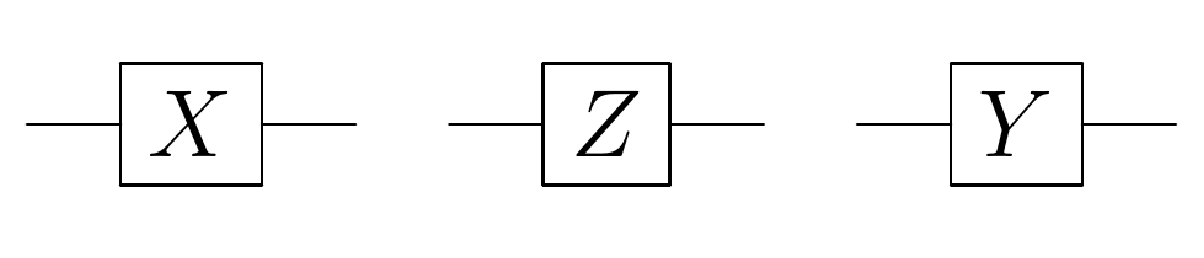

In [ ]:
display.display(img1)

These gates can be connected in a sequence. For example if a qubit is first acted upon by the Pauli-Z gate and then by Pauli-X then the circuit is shown in figure 2.

<b>Figure 2.</b> Pauli-Z gate is applied to the qubit first followed by Pauli-X gate.

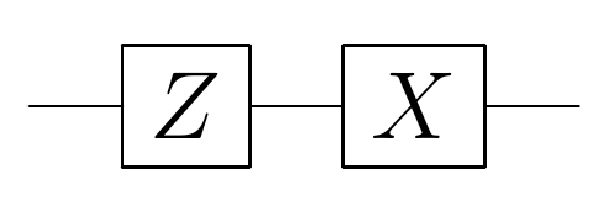

In [ ]:
display.display(img2)

Although, in the circuit diagram the input flows from left to right, when we write it as a linear expression we use the convention that the input vector is written to the right of the operator. For example if Pauli-Y is applied to $\rvert0\rangle$, we write $Y\rvert0\rangle$. As a result, the action of the circuit shown in figure 2 is written as,

$$XZ\rvert\psi\rangle$$

where $\rvert\psi\rangle$ is a single-qubit input. This looks the reverse of what is shown in the figure but is a little idiosyncrasy we have to get used to!

### 04.04.05: Computing the Circuit Operation

Given a circuit, we can compute the overall effect of the circuit on a qubit by simply multiplying the operators together (in order) and then applying them with the qubit.

For example, the operations shown in the circuit for figure 2 reduces to $XZ=\begin{bmatrix}0&1\\1&0\end{bmatrix}\begin{bmatrix}1&0\\0&-1\end{bmatrix}=\begin{bmatrix}0&-1\\1&0\end{bmatrix}$.

If $\rvert\psi\rangle=\rvert+\rangle$, then the resulting output is $\begin{bmatrix}0&-1\\1&0\end{bmatrix}\begin{bmatrix}\frac{1}{\sqrt{2}}\\\frac{1}{\sqrt{2}}\end{bmatrix}=\begin{bmatrix}-\frac{1}{\sqrt{2}}\\\frac{1}{\sqrt{2}}\end{bmatrix}$.

This rule applies to as many sequential gate operations as we'd like to apply on a qubit.

# 04 Quizzes

## Q04.01

1. Compute the probabilities of measurement outcomes for the following qubits with respect to the standard basis $\{\rvert0\rangle, \rvert1\rangle\}$ and the Hadamard basis $\{\rvert+\rangle, \rvert-\rangle\}$. Use the inner product to compute the transition amplitudes.

    a. $-i\rvert0\rangle$
    
    b. $\frac{i}{\sqrt{2}}(\rvert0\rangle+\rvert1\rangle)$
    
    c. $\frac{-1}{\sqrt{2}}(\rvert+\rangle-\rvert-\rangle)$
    
    d. $\frac{1}{\sqrt{2}}(\rvert0\rangle+e^{-i\pi}\rvert1\rangle)$
    
    e. $\frac{1}{\sqrt{2}}(\rvert1\rangle-\rvert0\rangle)$
    
    f. $\frac{1+i}{2}\rvert+\rangle+\frac{1-i}{2}\rvert-\rangle$
<br>

2. Given the following qubits, which ones are the same state and which ones represent distinct states?

    a. $-i\rvert0\rangle$ and $\rvert0\rangle$
    
    b. $\rvert1\rangle$ and $-\rvert1\rangle$
    
    c. $\frac{-1}{\sqrt{2}}(\rvert0\rangle+\rvert1\rangle)$ and $\frac{i}{\sqrt{2}}(\rvert0\rangle+\rvert1\rangle)$
    
    d. $\frac{-1}{\sqrt{2}}(\rvert+\rangle-\rvert-\rangle)$ and $\frac{1}{\sqrt{2}}(\rvert-\rangle-\rvert+\rangle)$
    
    e. $\frac{1}{\sqrt{2}}(\rvert0\rangle+e^{-i\pi}\rvert1\rangle)$ and $\frac{1}{\sqrt{2}}(\rvert1\rangle-\rvert0\rangle)$

## Q04.02

<b>1.1 What are the measurement operators for the following basis sets?</b>

   1. $\{\rvert+\rangle, \rvert-\rangle\}$
<br><br>    
   2. $\left\{\begin{bmatrix}\frac{i\sqrt{3}}{\sqrt{5}}\\\frac{\sqrt{2}}{\sqrt{5}}\end{bmatrix}, \begin{bmatrix}\frac{\sqrt{2}}{\sqrt{5}}\\\frac{i\sqrt{3}}{\sqrt{5}}\end{bmatrix}\right\}$
<br><br>    
   3. $\left\{\frac{1}{\sqrt{3}}\rvert+\rangle-\frac{\sqrt{2}}{\sqrt{3}}\rvert-\rangle, -\frac{\sqrt{2}}{\sqrt{3}}\rvert+\rangle-\frac{1}{\sqrt{3}}\rvert-\rangle\right\}$
<br>

<b>1.2 For each of the measurement operators above, calculate the probability of collapse for the following qubits and the final state of the qubit after measurement.</b>
<br>
   1. $\rvert+\rangle$
<br><br>         
   2. $\frac{i}{\sqrt{3}}\rvert0\rangle-\frac{\sqrt{2}}{\sqrt{3}}\rvert1\rangle$

## Q04.03

<b>2.1 Compute the density matrices for the following scenarios where a source is preparing the following qubits:</b>

   1. $\rvert+\rangle$ with probability $\frac{1}{3}$ and $\rvert-\rangle$ with probability $\frac{2}{3}$.
   
   2. $\rvert0\rangle$ with probability $\frac{1}{5}$ and $\rvert+\rangle$ with probability $\frac{4}{5}$.
   
   3. $\rvert-\rangle$ with probability $\frac{1}{4}$, $\rvert0\rangle$ with probability $\frac{1}{5}$ and $\rvert+\rangle$ with probability $1-(\frac{1}{4}+\frac{1}{5})$.
   
   4. $\frac{1+\sqrt{3}i}{\sqrt{5}}\rvert+\rangle+\frac{1}{\sqrt{5}}\rvert-\rangle$ with probability $\frac{9}{10}$ and $\rvert0\rangle$ with probability $\frac{1}{10}$.
   
   5. $e^{i\frac{\pi}{4}}\rvert1\rangle$

<b>2.2 Compute the probability of following outcomes, using density matrix formulation, for each of the quantum system states given above.</b>
    
   1. $\rvert0\rangle$
   
   2. $\rvert+\rangle$
   
   3. $\frac{i}{\sqrt{3}}\rvert0\rangle-\frac{\sqrt{2}}{\sqrt{3}}\rvert1\rangle$

## Q04.04

In addition to the above gates, there are a few more that show up in literature quite often. These are: the phase shift gates $T=e^{i\frac{\pi}{8}}\begin{bmatrix}e^{-i\frac{\pi}{8}}&0\\0&e^{i\frac{\pi}{8}}\end{bmatrix}$ and $S=\begin{bmatrix}1&0\\0&i\end{bmatrix}$, the square-root of NOT gate $\sqrt{NOT}=\frac{1}{2}\begin{bmatrix}1+i&1-i\\1-i&1+i\end{bmatrix}$.

1. Prove that all the Pauli gates are Unitary operations.

2. Prove $H=\frac{1}{\sqrt{2}}(X+Z)$

3. Prove $X=HZH$

4. Prove $S=T^2$

## Q04.05

Compute the effect of the following circuit on each of the qubits given. Comment on your observations.

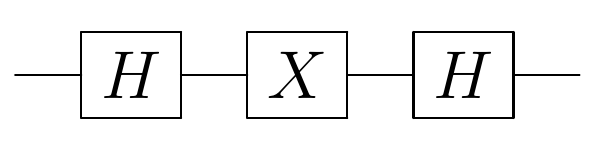

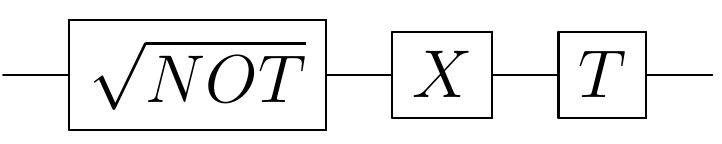

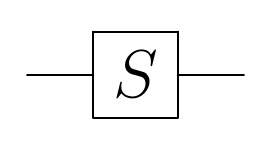

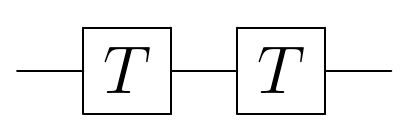

In [ ]:
display.display(img3)
display.display(img4)
display.display(img5)
display.display(img6)

Qubits:

1. $\rvert0\rangle$

2. $\rvert1\rangle$

3. $\rvert+\rangle$

4. $\rvert-\rangle$